In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers 
from keras.utils import to_categorical
from keras.datasets import cifar10

plt.style.use("fivethirtyeight")




2023-09-12 12:36:23.957396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 12:36:24.867745: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
# First image
index = 10
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

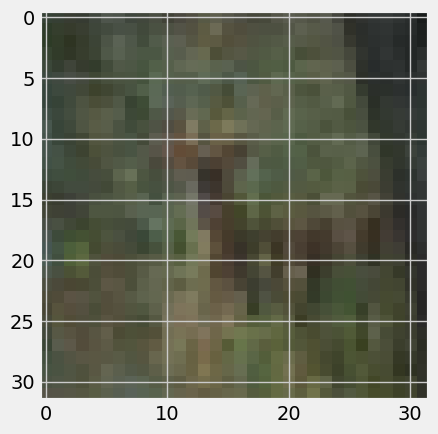

In [7]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [8]:
# Get the image label
print("The image label: ", y_train[index])

# Get the image classification
classification = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship"]
print("The image class: ", classification[y_train[index][0]])

The image label:  [4]
The image class:  Deer


In [9]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new lables
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# Print the new label of the image/picture above
print("The one hot label is: ", y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [12]:
# Create the models architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a second convolution layer
model.add(Conv2D(32, (5,5), activation="relu"))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flatening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation="relu"))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation="relu"))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation="relu"))

# Add a layer with 10 neurons
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



2023-09-12 12:36:30.053281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 12:36:30.668773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 12:36:30.668825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 12:36:30.673262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 12:36:30.673358: I tensorflow/compile

In [13]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=30, validation_split=0.2)

2023-09-12 12:36:34.753678: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2023-09-12 12:36:35.116468: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/30


2023-09-12 12:36:40.444084: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-09-12 12:36:45.071407: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb8fc02a530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-12 12:36:45.071466: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-09-12 12:36:45.249800: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-12 12:36:46.470515: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 [==============================] - 18s 27ms/step - loss: 1.7797 - accuracy: 0.3375 - val_loss: 1.4643 - val_accuracy: 0.4586
Epoch 2/30
157/157 [==============================] - 3s 21ms/step - loss: 1.4105 - accuracy: 0.4820 - val_loss: 1.3127 - val_accuracy: 0.5208
Epoch 3/30
157/157 [==============================] - 3s 20ms/step - loss: 1.2716 - accuracy: 0.5409 - val_loss: 1.3196 - val_accuracy: 0.5211
Epoch 4/30
157/157 [==============================] - 3s 20ms/step - loss: 1.1679 - accuracy: 0.5824 - val_loss: 1.1176 - val_accuracy: 0.6012
Epoch 5/30
157/157 [==============================] - 3s 20ms/step - loss: 1.0878 - accuracy: 0.6120 - val_loss: 1.0587 - val_accuracy: 0.6228
Epoch 6/30
157/157 [==============================] - 3s 20ms/step - loss: 1.0186 - accuracy: 0.6385 - val_loss: 1.0225 - val_accuracy: 0.6382
Epoch 7/30
157/157 [==============================] - 3s 20ms/step - loss: 0.9573 - accuracy: 0.6602 - val_loss: 0.9769 - val_accuracy: 0.6560
Epoch 8/3

In [14]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 5ms/step - loss: 1.1067 - accuracy: 0.6990


0.6990000009536743

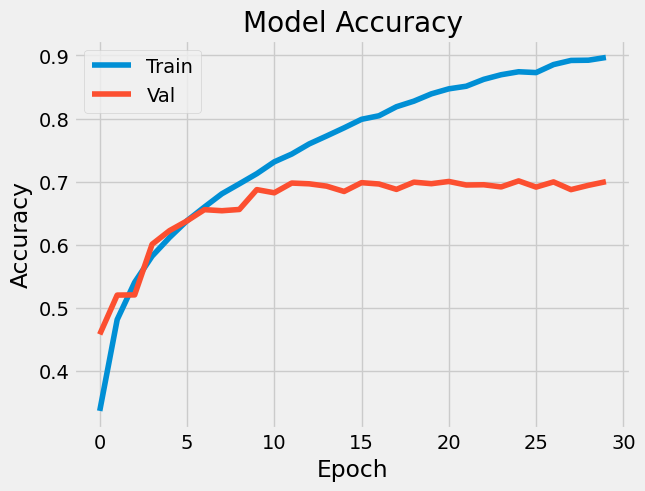

In [15]:
# Visualize the accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()


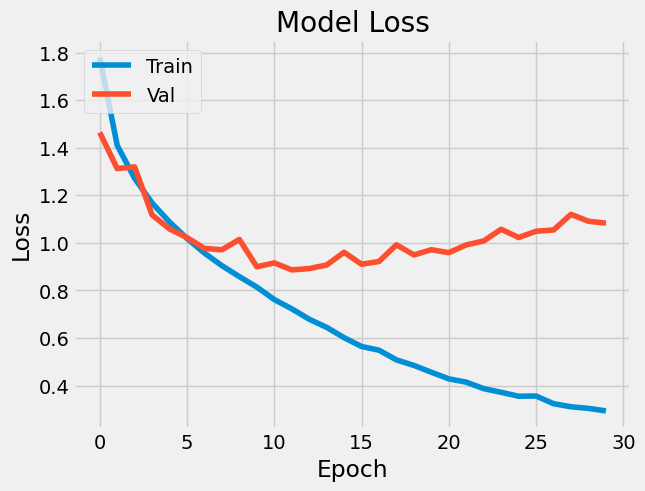

In [16]:
# Visualize the models loss
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

In [17]:
# Test the model with an example
new_image = plt.imread("kitty-cat.jpg")
img = plt.imshow(new_image)

FileNotFoundError: [Errno 2] No such file or directory: 'kitty-cat.jpg'

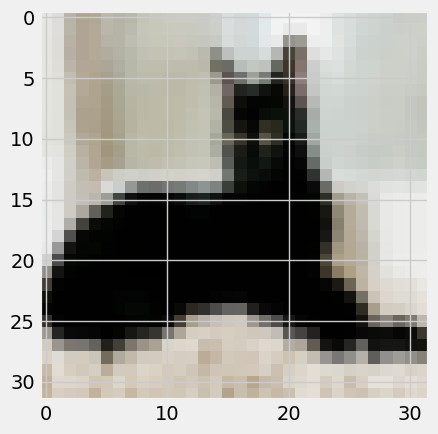

In [ ]:
# Resize the image
from skimage.transform import resize

resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)



In [ ]:
# Get the models predictions 
predictions = model.predict(np.array([resized_image]))

predictions

1/1 [==============================] - 0s 107ms/step


array([[3.90721768e-01, 6.30386057e-04, 3.41720134e-02, 3.50180298e-01,
        2.81317979e-02, 5.92989102e-02, 3.18429928e-04, 1.05782278e-01,
        1.84223875e-02, 1.23417955e-02]], dtype=float32)

In [ ]:
# Sort the predictions from least to greatests
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            tmp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = tmp

# Show the sorted labels in order
print(list_index)

[0, 3, 7, 5, 2, 4, 8, 9, 1, 6]


Airplane : 39.07 %
Cat : 35.02 %
Horse : 10.58 %
Dog : 5.93 %
Bird : 3.42 %


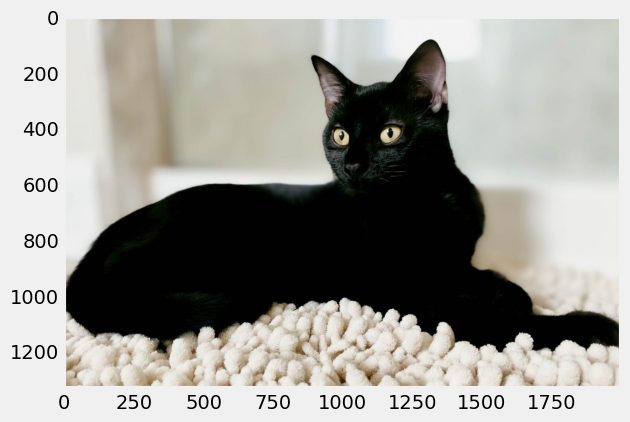

In [ ]:
img = plt.imshow(new_image)
plt.grid(None)

# Print the top 5 most predictions
for i in range(5):
    print(classification[list_index[i]], ":", round(predictions[0][list_index[i]] * 100, 2), "%")